# In combination with the notebook for recognizing landmarks on hands and creating your own tensorflow model using MediaPipe, we can create a way to regonize ASL Letters!

In [ ]:
!pip install --upgrade pip
!pip install mediapipe-model-maker
#!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.5/117.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 21.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 53.4 

In [ ]:
!pip install kaggle

In [ ]:
output = !ls -a /root
output

if '.kaggle' not in output:
  !mkdir /root/.kaggle
  !touch /root/.kaggle/kaggle.json
else:
  output = !ls -a /root/.kaggle
  if 'kaggle.json' not in output:
    !touch /root/.kaggle/kaggle.json

In [ ]:
import shutil
shutil.rmtree("/content/ASL_Alphabet_Dataset")

In [ ]:
import json

# Define the path to the kaggle.json file
ENV_PATH = '/content/kaggle.json'

kaggle_json_path = '/root/.kaggle/kaggle.json';

kaggle_json_data = "";

with open(ENV_PATH, 'r') as f:
    kaggle_json_data = json.load(f)

# Save the updated kaggle.json file
with open(kaggle_json_path, 'w') as f:
    json.dump(kaggle_json_data, f)

print('Kaggle API key successfully updated!')


!kaggle datasets download -d debashishsau/aslamerican-sign-language-aplhabet-dataset
!unzip -q aslamerican-sign-language-aplhabet-dataset

Kaggle API key successfully updated!
100% 4.19G/4.20G [00:47<00:00, 67.7MB/s]
100% 4.20G/4.20G [00:47<00:00, 94.2MB/s]


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!mv /content/ASL_Alphabet_Dataset/asl_alphabet_train/nothing /content/ASL_Alphabet_Dataset/asl_alphabet_train/None

In [ ]:
from google.colab import files
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

from mediapipe_model_maker import gesture_recognizer

import matplotlib.pyplot as plt

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

import cv2
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
dataset_train_path = '/content/ASL_Alphabet_Dataset/asl_alphabet_train'
dataset_test_path = '/content/ASL_Alphabet_Dataset/asl_alphabet_test'

In [ ]:
# !wget https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/rps_data_sample.zip
# !unzip rps_data_sample.zip
# dataset_path = "rps_data_sample"

In [ ]:
# !wget -O /tmp/model_maker/gesture_recognizer/gesture_embedder/variables/variables.index -q https://storage.googleapis.com/mediapipe-assets/variables.index

In [ ]:
# Make dataset smaller

import os

def remove_parentheses(directory):
    # Loop through all folders in the specified directory
    import os
    import re

    # Specify the root directory to start the loop
    root_directory = directory

    # Loop through all the folders in the root directory
    for folder_name in os.listdir(root_directory):
        folder_path = os.path.join(root_directory, folder_name)

        # Check if the item in the directory is a folder
        if os.path.isdir(folder_path):
            print(f"Processing folder: {folder_name}")

            # Loop through all the files in the current folder
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)

                # Check if the item in the directory is a file
                if os.path.isfile(file_path):
                    # Check if the file name contains a start or end parenthesis
                    if '(' in file_name or ')' in file_name:
                        print(f"Deleting file: {file_name}")
                        os.remove(file_path)
                    else:
                        # Extract the numeric part of the file name (if any)
                        numeric_part = re.search(r'\d+', file_name)
                        if numeric_part:
                            number = int(numeric_part.group())
                            # Check if the number is greater than 200
                            if number > 10000:
                                print(f"Deleting file: {file_name}")
                                os.remove(file_path)

# Call the function to remove parentheses from file names in the directory
remove_parentheses('/content/ASL_Alphabet_Dataset/asl_alphabet_train')


In [ ]:
import os

def remove_test_suffix(folder_path):
    # Loop through the files and subfolders in the current folder
    for item_name in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item_name)

        # Check if the item is a file
        if os.path.isfile(item_path):
            # Remove the '_test' suffix from the file name
            new_file_name = item_name.replace('_test', '')
            new_item_path = os.path.join(folder_path, new_file_name)

            # Rename the file
            os.rename(item_path, new_item_path)

        # Check if the item is a subfolder
        elif os.path.isdir(item_path):
            # Recursively call the function on the subfolder
            remove_test_suffix(item_path)

# Example usage:
folder_path = '/content/ASL_Alphabet_Dataset/asl_alphabet_test'
remove_test_suffix(folder_path)


In [ ]:
import os
import shutil

# Loop through all the files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the item in the directory is a file
    if os.path.isfile(file_path):
        # Extract the first word/letter of the file name before the underscore
        first_word = file_name.split('.')[0]

        # Create a directory based on the first word/letter if it doesn't exist
        directory_path = os.path.join(folder_path, first_word)
        if not os.path.exists(directory_path):
            os.makedirs(directory_path)

        # Move the file into the corresponding directory
        new_file_path = os.path.join(directory_path, '')
        shutil.move(file_path, new_file_path)


In [ ]:
!mv /content/ASL_Alphabet_Dataset/asl_alphabet_test/nothing /content/ASL_Alphabet_Dataset/asl_alphabet_test/None
!mv /content/ASL_Alphabet_Dataset/asl_alphabet_test/None/nothing.jpg /content/ASL_Alphabet_Dataset/asl_alphabet_test/None/None.jpg

In [ ]:
!wget https://storage.googleapis.com/mediapipe-assets/palm_detection_full.tflite -O /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
!wget https://storage.googleapis.com/mediapipe-assets/hand_landmark_full.tflite -O /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
!wget https://storage.googleapis.com/mediapipe-assets/gesture_embedder.tar.gz -O /tmp/model_maker/gesture_recognizer/gesture_embedder/gesture_embedder.tar.gz

/tmp/model_maker/gesture_recognizer/palm_detection_full.tflite: No such file or directory
/tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite: No such file or directory
/tmp/model_maker/gesture_recognizer/gesture_embedder/gesture_embedder.tar.gz: No such file or directory


In [ ]:
data_train = gesture_recognizer.Dataset.from_folder(
    dirname=dataset_train_path,
    hparams=gesture_recognizer.HandDataPreprocessingParams(
        min_detection_confidence=0.5
    )
)


# Needs Wifi with more bandwidth to run

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite


In [ ]:
data_test = gesture_recognizer.Dataset.from_folder(
    dirname=dataset_test_path,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)

In [ ]:
train_data, rest_data = data_train.split(.9)
validation_data, test_data = rest_data.split(.9)
print(test_data)

hparams = gesture_recognizer.HParams(
    export_dir="exported_model",
    learning_rate=0.001,
    batch_size=64,
    epochs=50
)

options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

loss, acc = model.evaluate(validation_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

model.export_model()
!ls exported_model

In [ ]:
# import shutil

# # Zip the directory
# shutil.make_archive("/content/exported_model", "zip", "/content/exported_model")

# # Download the zip file
# from google.colab import files
# files.download("/content/exported_model.zip")


In [ ]:
import zipfile
with zipfile.ZipFile('/content/exported_model_1000_set.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/exported_model')

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

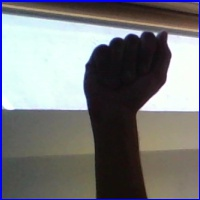

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/ASL_Alphabet_Dataset/asl_alphabet_test/A/A.jpg")
cv2_imshow(img)

In [ ]:
BaseOptions = mp.tasks.BaseOptions
GestureRecognizer = mp.tasks.vision.GestureRecognizer
GestureRecognizerOptions = mp.tasks.vision.GestureRecognizerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

base_options = python.BaseOptions(model_asset_path='/content/exported_model/gesture_recognizer.task')
options = GestureRecognizerOptions(
    base_options=base_options,
    running_mode=VisionRunningMode.IMAGE)
recognizer = vision.GestureRecognizer.create_from_options(options)

NameError: ignored

In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

def draw_landmarks_on_image(rgb_image, detection_result):
    gesture_landmark_list = detection_result.hand_landmarks
    annotated_image = np.copy(rgb_image)

    # Loop through the detected hands to visualize.
    for idx in range(len(gesture_landmark_list)):
        hand_landmarks = gesture_landmark_list[idx]

        # Convert hand landmarks to the required format.
        hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        #print(hand_landmarks_proto)
        hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
        ])
        #print(hand_landmarks_proto)

        # Draw the hand landmarks on the image.
        solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=hand_landmarks_proto,
            connections=mp.solutions.hands_connections.HAND_CONNECTIONS,
            landmark_drawing_spec=mp.solutions.drawing_styles.
            get_default_hand_landmarks_style(),
            connection_drawing_spec=mp.solutions.drawing_styles.
            get_default_hand_connections_style())

    return annotated_image

In [ ]:
images = []

import os
import shutil

folder_path = "/content/ASL_Alphabet_Dataset/asl_alphabet_test"

# Loop through all the files in the folder
for directory in os.listdir(folder_path):
  image_folder = os.path.join(folder_path, directory)
  for files in os.listdir(image_folder):
    images.append(os.path.abspath(os.path.join(image_folder, directory + '.jpg')))
print(images)

['/content/ASL_Alphabet_Dataset/asl_alphabet_test/D/D.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/C/C.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/S/S.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/P/P.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/T/T.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/X/X.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/J/J.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/Y/Y.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/N/N.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/R/R.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/U/U.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/W/W.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/O/O.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/M/M.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/L/L.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/E/E.jpg', '/content/ASL_Alphabet_Dataset/asl_alphabet_test/A/A.jp

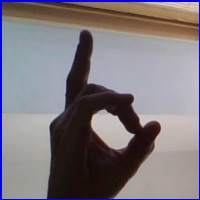

[]


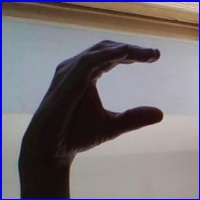

[]


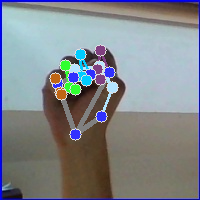

[[Category(index=-1, score=0.8938589692115784, display_name='', category_name='S')]]


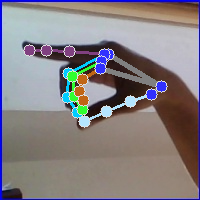

[[Category(index=-1, score=0.8832088112831116, display_name='', category_name='P')]]


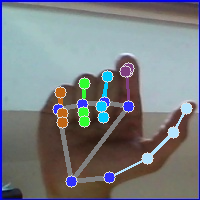

[[Category(index=-1, score=0.9833387136459351, display_name='', category_name='T')]]


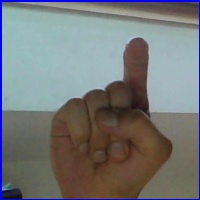

[]


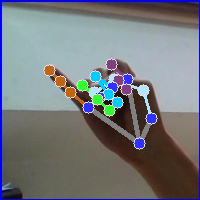

[[Category(index=-1, score=0.8381261229515076, display_name='', category_name='J')]]


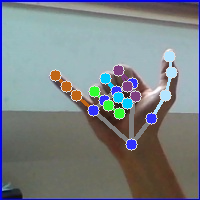

[[Category(index=-1, score=0.991858184337616, display_name='', category_name='Y')]]


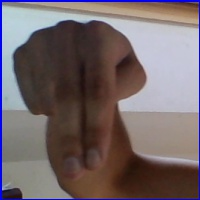

[]


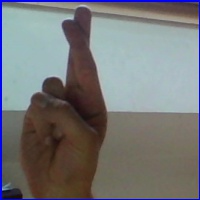

[]


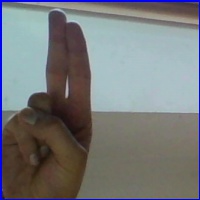

[]


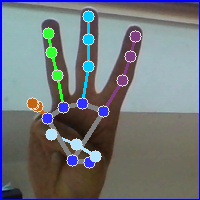

[[Category(index=-1, score=0.9938640594482422, display_name='', category_name='W')]]


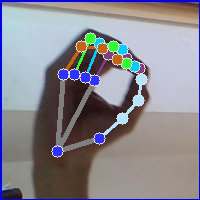

[[Category(index=-1, score=0.9155771732330322, display_name='', category_name='O')]]


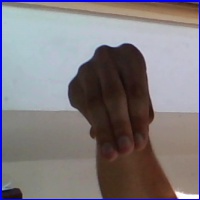

[]


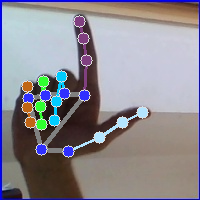

[[Category(index=-1, score=0.971631646156311, display_name='', category_name='L')]]


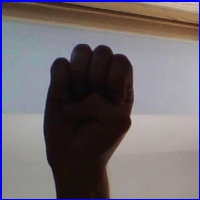

[]


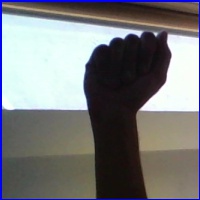

[]


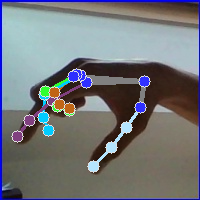

[[Category(index=-1, score=0.721596896648407, display_name='', category_name='Q')]]


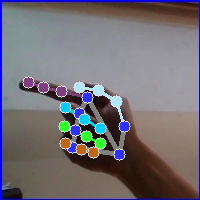

[[Category(index=-1, score=0.9748544692993164, display_name='', category_name='G')]]


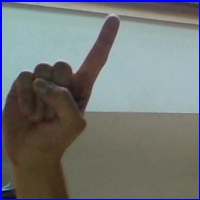

[]


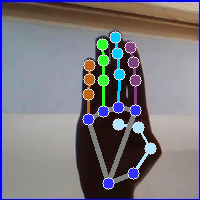

[[Category(index=-1, score=0.985383927822113, display_name='', category_name='B')]]


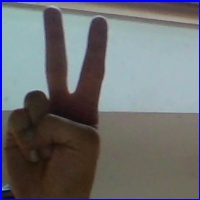

[]


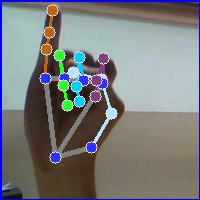

[[Category(index=-1, score=0.9089871644973755, display_name='', category_name='I')]]


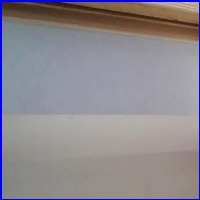

[]


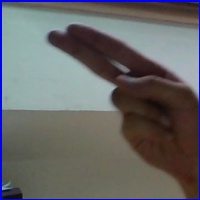

[]


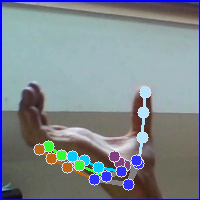

[[Category(index=-1, score=0.9720768332481384, display_name='', category_name='space')]]


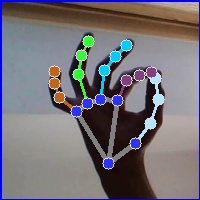

[[Category(index=-1, score=0.9986149072647095, display_name='', category_name='F')]]


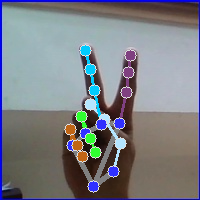

[[Category(index=-1, score=0.8764709830284119, display_name='', category_name='K')]]


In [ ]:
for path in images:
  image = mp.Image.create_from_file(path)
  gesture_recognition_result = recognizer.recognize(image)

  results = gesture_recognition_result.hand_landmarks
  annotated_image = draw_landmarks_on_image(image.numpy_view(), gesture_recognition_result)
  cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
  top_gesture = gesture_recognition_result.gestures
  hand_landmarks = gesture_recognition_result.hand_landmarks

  print(top_gesture)
